<a href="https://colab.research.google.com/github/Dushyanttara/colab_research/blob/master/AutoViML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AutoViMl can take care of categorical encoding and also features selection, in case you have  alot of features (100, 200) this can help you to select them .
(auto variation interpretation machine learning)

similarly you do not need to do a lot of preprocessing here

In [0]:
!pip install xgboost
!pip install catboost

In [17]:
!pip install autoviml

In [18]:
!pip install shap

In [0]:
from __future__ import print_function
import sys,tempfile, urllib, os
import pandas as pd

In [0]:
OUTPUT_FILE = '/content/churn_data.csv'

In [0]:
churn_df = pd.read_csv(OUTPUT_FILE)

In [22]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [0]:

size = int(0.7*churn_df.shape[0])
train_df = churn_df[:size]
test_df = churn_df[size:]

In [26]:
train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
test_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4930,8180-AKMJV,Female,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),44.55,44.55,No
4931,4298-OYIFC,Male,0,Yes,No,15,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,103.45,1539.8,No
4932,5566-SOEZD,Male,0,Yes,Yes,27,Yes,No,Fiber optic,Yes,Yes,No,No,No,No,One year,Yes,Credit card (automatic),80.65,2209.75,No
4933,9842-EFSYY,Female,0,No,Yes,4,No,No phone service,DSL,Yes,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Mailed check,57.20,223.75,No
4934,2272-WUSPA,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Electronic check,110.75,7751.7,No


In [0]:
from autoviml.Auto_ViML import Auto_ViML

In [0]:
target='Churn'

hyper_param: Tuning options are GridSearch ('GS') and RandomizedSearch ('RS'). Default is 'GS'.

feature_reduction: Default = 'True' but it can be set to False if you don't want automatic

Boosting Flag: you have 4 possible choices (default is False):

None = This will build a Linear Model

False = This will build a Random Forest or Extra Trees model (also known as Bagging)

True = This will build an XGBoost model

CatBoost = THis will build a CatBoost model (provided you have CatBoost installed)

Train (Size: 4930,21) has Single_Label with target: ['Churn']
"
 ################### Binary-Class ##################### " 
Shuffling the data set before training
 Class  -> Counts -> Percent
   Yes:    1289  ->   26.1%
    No:    3641  ->   73.9%
Selecting Binary_Classification Classifier...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This will take time...
String or Multi Class target: Churn transformed as follows: {'No': 0, 'Yes': 1}
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  10
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  5
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.025052
0:	learn: 0.7759748	test: 0.7759748	test1: 0.8032454	best: 0.8032454 (0)	total: 78.5ms	remaining: 5m 13s


100:	learn: 0.8181204	test: 0.8233040	test1: 0.8296146	best: 0.8316430 (87)	total: 807ms	remaining: 31.2s
200:	learn: 0.8260086	test: 0.8393058	test1: 0.8438134	best: 0.8458418 (159)	total: 1.42s	remaining: 26.9s
300:	learn: 0.8318684	test: 0.8469687	test1: 0.8458418	best: 0.8478702 (244)	total: 2s	remaining: 24.6s
400:	learn: 0.8406581	test: 0.8544061	test1: 0.8417850	best: 0.8478702 (244)	total: 2.6s	remaining: 23.4s
Stopped by overfitting detector  (250 iterations wait)

bestTest = 0.8478701826
bestIteration = 244

Shrink model to first 245 iterations.
    Actual training time (in seconds): 3
###########  S I N G L E  M O D E L   R E S U L T S #################
5-fold Cross Validation  Accuracy = 84.8%
    CatBoost Best Parameters for Model: Iterations = 244, learning_rate = 0.03
Finding Best Threshold for Highest F1 Score...
    Using threshold=0.5. However, 0.37 provides better F1=0.68 for rare class...
########################################################
CatBoost Model Predic

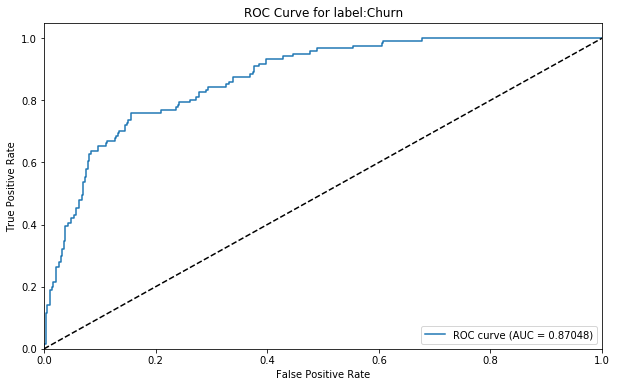

Average precision-recall score: 0.80
Macro F1 score, averaged over all classes: 0.79


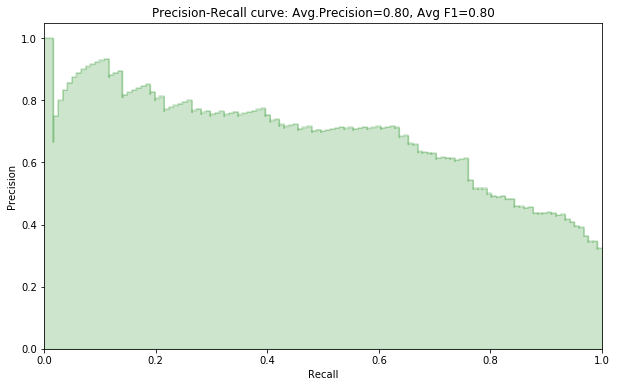

After multiple models, Ensemble Model Results:
    Balanced Accuracy Score = 74.087%
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       372
           1       0.66      0.58      0.62       121

    accuracy                           0.82       493
   macro avg       0.76      0.74      0.75       493
weighted avg       0.82      0.82      0.82       493

[[336  36]
 [ 51  70]]
########################################################
Single Model is better than Ensembling Models for this data set.


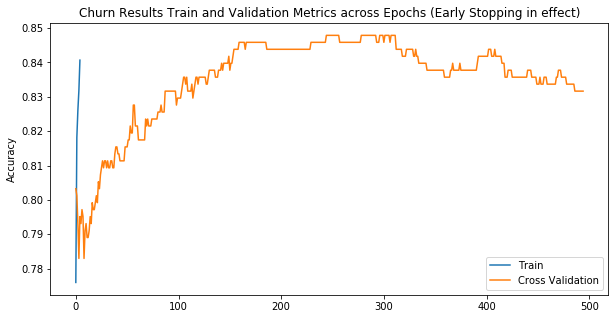

    Time taken for this Target (in seconds) = 8


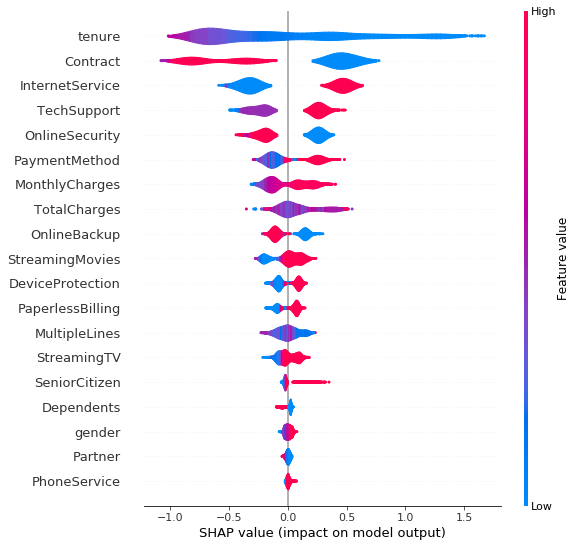

Plotting SHAP (SHapley Additive exPlanations) values to explain the output of model
############### P R E D I C T I O N  O N  T E S T  #################
    Time taken for this Target (in seconds) = 13
Training model on complete Train data and Predicting using give Test Data...
    No Entropy Binning specified or there are no numeric vars in data set to Bin

Imbalanced Class Training using Majority Class Downsampling method...
    Setting best params for CatBoost model
Rare Class = 1
    Pct of Rare Class in data = 26.15%
    Number of iterations for training =  1
This is not an Imbalanced data set. Training in one batch...
0:	learn: 0.7819473	total: 7.92ms	remaining: 1.92s
100:	learn: 0.8210953	total: 635ms	remaining: 899ms
200:	learn: 0.8300203	total: 1.23s	remaining: 263ms
243:	learn: 0.8328600	total: 1.5s	remaining: 0us
Actual Training time taken in seconds = 2
Test Data predictions using Threshold = 0.5
QuickML_Ensembling completed.
    Time taken for Ensembling: 2.1 seconds
#####

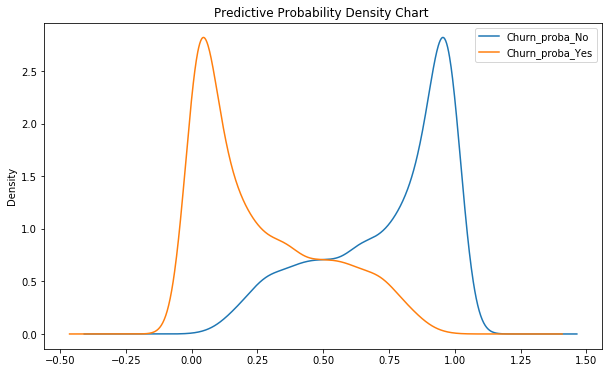

In [34]:
model, features, trainm, testm = Auto_ViML(train_df, target, test_df, sample_submission='',
                                    scoring_parameter='',
                                    hyper_param='RS',feature_reduction=True,
                                     Boosting_Flag='CatBoost',Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False, 
                                    Imbalanced_Flag=True, 
                                    verbose=1)

In [35]:
features

['Contract',
 'TechSupport',
 'InternetService',
 'OnlineSecurity',
 'PaymentMethod',
 'tenure',
 'MonthlyCharges',
 'StreamingMovies',
 'PaperlessBilling',
 'OnlineBackup',
 'TotalCharges',
 'SeniorCitizen',
 'MultipleLines',
 'Dependents',
 'gender',
 'DeviceProtection',
 'Partner',
 'StreamingTV',
 'PhoneService']

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
testm

,customerID,Contract,TechSupport,InternetService,OnlineSecurity,PaymentMethod,tenure,MonthlyCharges,StreamingMovies,PaperlessBilling,OnlineBackup,TotalCharges,SeniorCitizen,MultipleLines,Dependents,gender,DeviceProtection,Partner,StreamingTV,PhoneService,Churn_proba_No,Churn_proba_Yes,Churn_Logistic Regression_predictions,Churn_Linear Discriminant_predictions,Churn_Naive Bayes_predictions,Churn_Bagging_predictions,Churn_CatBoost_predictions,Churn_Ensembled_predictions
4930,8180-AKMJV,0,2,0,0,2,1,0.261692,0,1,0,2190,0,1,0,1,2,0,0,0,0.492602,0.507398,No,No,Yes,No,Yes,No
4931,4298-OYIFC,0,0,2,0,3,15,0.847761,2,1,0,4654,0,0,0,0,0,1,2,0,0.300529,0.699471,Yes,Yes,Yes,Yes,Yes,Yes
4932,5566-SOEZD,2,2,2,2,2,27,0.620896,0,1,2,4655,0,1,1,0,2,1,0,0,0.895743,0.104257,No,No,No,No,No,No
4933,9842-EFSYY,0,2,0,2,0,4,0.387562,2,1,2,4656,0,2,1,1,0,0,2,1,0.713105,0.286895,No,No,No,No,No,No
4934,2272-WUSPA,1,2,2,2,3,72,0.920398,2,1,2,4657,0,0,0,1,0,1,2,0,0.888443,0.111557,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2,0,0,2,0,24,0.662189,2,1,0,6526,0,0,1,0,0,1,2,0,0.894163,0.105837,No,No,No,No,No,No
7039,2234-XADUH,2,2,2,0,2,72,0.845274,2,1,2,6527,0,0,1,1,0,1,2,0,0.800955,0.199045,No,No,No,No,No,No
7040,4801-JZAZL,0,2,0,2,3,11,0.112935,0,1,0,6528,0,2,1,1,2,1,0,1,0.653716,0.346284,No,No,No,No,No,No
7041,8361-LTMKD,0,2,2,0,0,4,0.558706,0,1,0,6529,1,0,0,0,2,1,0,0,0.337463,0.662537,Yes,Yes,Yes,Yes,Yes,Yes


In [39]:
print(confusion_matrix(test_df[target].values,testm['Churn_CatBoost_predictions'].values))

[[1401  132]
 [ 285  295]]


In [40]:
print(confusion_matrix(test_df[target].values,testm['Churn_Logistic Regression_predictions'].values))

[[1394  139]
 [ 278  302]]


In [41]:

print(confusion_matrix(test_df[target].values,testm['Churn_Ensembled_predictions'].values))

[[1373  160]
 [ 270  310]]


In [42]:
print(classification_report(test_df[target].values,testm['Churn_CatBoost_predictions'].values))

              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1533
         Yes       0.69      0.51      0.59       580

    accuracy                           0.80      2113
   macro avg       0.76      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



In [43]:
print(classification_report(test_df[target].values,testm['Churn_Ensembled_predictions'].values))

              precision    recall  f1-score   support

          No       0.84      0.90      0.86      1533
         Yes       0.66      0.53      0.59       580

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

